# Correlación

## Definición

La correlación es una medida estadística que indica la relación entre dos variables cuantitativas, mostrando cuánto se asocian sus valores. Se mide típicamente con el coeficiente de correlación de Pearson, que varía entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta, y 0 indica ausencia de correlación lineal.

Por ejemplo, si consideramos las variables $X = \\{1, 2, 3, 4\\}$ y $Y = \\{2, 4, 6, 8\\}$, la correlación positiva perfecta se observa porque $Y = 2X$. El coeficiente se calcula como:

<div class="alert alert-block alert-info">

**Definición.**
$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} 
$$
<br>
$$
b = \bar{y} - m \bar{x} 
$$




<div class="alert alert-success">

## Ejercicio 1.

Con el siguiente código en Python se carga un conjunto de datos reales sobre salud en México, enfocado en el análisis de factores asociados con la **hipertensión arterial**. Este conjunto fue construido a partir de fuentes oficiales y públicas, combinando datos de la Encuesta Nacional de Salud y Nutrición (ENSANUT) y una versión integrada publicada en Kaggle.

```python
import pandas as pd
import numpy as np

df = pd.read_csv("Data.csv")
df.columns

# Conversión de cada columna en un arreglo para facilitar el análisis
edad                          = df['edad'].to_numpy()
sexo                          = df['sexo'].to_numpy()
actividad_total               = df['actividad_total'].to_numpy()
valor_hemoglobina_glucosilada = df['valor_hemoglobina_glucosilada'].to_numpy()
resultado_glucosa_promedio   = df['resultado_glucosa_promedio'].to_numpy()
valor_colesterol_ldl         = df['valor_colesterol_ldl'].to_numpy()
valor_colesterol_hdl         = df['valor_colesterol_hdl'].to_numpy()
valor_trigliceridos          = df['valor_trigliceridos'].to_numpy()
masa_corporal                = df['masa_corporal'].to_numpy()
medida_cintura               = df['medida_cintura'].to_numpy()
riesgo_hipertension          = df['riesgo_hipertension'].to_numpy()
tension_arterial             = df['tension_arterial'].to_numpy()
```

<br>

Este código tiene las siguientes características:

- **Datos reales y representativos**: El conjunto de datos proviene de la [Encuesta Nacional de Salud y Nutrición (ENSANUT)](https://ensanut.insp.mx/encuestas/ensanutcontinua2022/descargas.php) y fue integrado y publicado en [Kaggle](https://www.kaggle.com/datasets/frederickfelix/hipertensin-arterial-mxico). Incluye variables biométricas, clínicas y de estilo de vida relevantes para el estudio de enfermedades crónicas como la hipertensión.

- **Variables clave**: Se incluyen indicadores como edad, sexo, actividad física total, hemoglobina glucosilada, glucosa promedio, colesterol LDL y HDL, triglicéridos, masa corporal, medida de cintura, presión arterial y riesgo de hipertensión.

- **Preparación estructurada**: Cada columna se convierte en un arreglo `numpy.ndarray`, lo que facilita el análisis estadístico y la construcción de modelos predictivos.

- **Aplicación práctica**: Este ejercicio busca mostrar cómo la regresión lineal puede ayudar a identificar factores de riesgo asociados con la hipertensión arterial, permitiendo generar modelos explicativos y predictivos útiles para la salud pública.

<br>

En esta ocasión, decidimos trabajar con datos reales para resaltar la importancia de aplicar modelos estadísticos como la regresión lineal en contextos clínicos y sociales. Este enfoque permite extraer conclusiones útiles para el diseño de intervenciones preventivas y políticas de salud en México.

</div>



In [1]:
# Importando los datos 
#Obteniendo los array 
### BEGIN SOLUTION
import pandas as pd
import numpy as np

df = pd.read_csv("Data.xls")

# Conversión de cada columna en un arreglo para facilitar el análisis
edad                          = df['edad'].to_numpy()
sexo                          = df['sexo'].to_numpy()
actividad_total               = df['actividad_total'].to_numpy()
valor_hemoglobina_glucosilada = df['valor_hemoglobina_glucosilada'].to_numpy()
resultado_glucosa_promedio   = df['resultado_glucosa_promedio'].to_numpy()
valor_colesterol_ldl         = df['valor_colesterol_ldl'].to_numpy()
valor_colesterol_hdl         = df['valor_colesterol_hdl'].to_numpy()
valor_trigliceridos          = df['valor_trigliceridos'].to_numpy()
masa_corporal                = df['masa_corporal'].to_numpy()
medida_cintura               = df['medida_cintura'].to_numpy()
riesgo_hipertension          = df['riesgo_hipertension'].to_numpy()
tension_arterial             = df['tension_arterial'].to_numpy()
df.head()
### END SOLUTION

,edad,sexo,actividad_total,valor_hemoglobina_glucosilada,resultado_glucosa_promedio,valor_colesterol_ldl,valor_colesterol_hdl,valor_trigliceridos,masa_corporal,medida_cintura,riesgo_hipertension,tension_arterial
0,41,2,120,5.2,103,86.0,34,123,32.889389,0.0,1,107
1,65,2,240,6.2,131,130.0,73,131,1.000000,0.0,0,104
2,68,2,480,5.2,103,86.0,34,123,1.000000,0.0,0,105
3,35,1,275,5.3,105,107.0,49,297,26.265339,98.5,1,117
4,65,2,255,7.0,154,76.0,41,136,1.000000,0.0,0,123




<div class="alert alert-success">

## Ejercicio 2.

En este ejercicio realizamos un **análisis exploratorio** mediante gráficos de dispersión para visualizar relaciones entre variables clínicas y biométricas que podrían estar asociadas con la hipertensión arterial. Este tipo de análisis es útil para detectar patrones, correlaciones y posibles relaciones no lineales antes de aplicar modelos estadísticos.

```python
# Análisis exploratorio
import matplotlib.pyplot as plt

def graficas_dispersion(ejes, x, y, color, refx, refy, ec='k', alpha=0.75, ylim=None):
    ejes.scatter(x, y, fc=color, ec=ec, alpha=alpha)
    ejes.set_xlabel(refx, color=color)
    ejes.set_ylabel(refy, color=color)
    ejes.tick_params(axis='x', colors=color)  # ← Colorea números y ticks del eje X
    ejes.tick_params(axis='y', colors=color)
    ejes.grid()
    if ylim:
        ejes.set_ylim(ylim)

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

graficas_dispersion(axs[0, 0], valor_colesterol_ldl, valor_colesterol_hdl, 'C0', '$x_0$', '$y_0$')
graficas_dispersion(axs[0, 1], masa_corporal, medida_cintura, 'C1', '$x_1$', '$y_2$')
graficas_dispersion(axs[1, 0], actividad_total, valor_colesterol_ldl, 'C2', '$x_2$', '$y_2$')
graficas_dispersion(axs[1, 1], valor_hemoglobina_glucosilada, masa_corporal, 'C3', '$x_2$', '$y_2$')

plt.tight_layout()
plt.show()
```

<br>

Este código tiene las siguientes características:

- **Función personalizada**: Se define `graficas_dispersion()` para generar gráficos de dispersión con estilo uniforme, etiquetas coloreadas y control de transparencia (`alpha`), lo que mejora la legibilidad y estética de los gráficos.

- **Visualización comparativa**: Se crean cuatro subgráficos que permiten comparar pares de variables relevantes:
  - Colesterol LDL vs HDL
  - Masa corporal vs Medida de cintura
  - Actividad física total vs Colesterol LDL
  - Hemoglobina glucosilada vs Masa corporal

- **Exploración visual**: Estos gráficos permiten observar tendencias, agrupamientos y posibles relaciones entre variables que podrían influir en el riesgo de hipertensión arterial.

<br>

Este tipo de análisis es fundamental para comprender la estructura de los datos antes de aplicar modelos predictivos. En el contexto de salud pública, visualizar estas relaciones ayuda a identificar factores de riesgo y diseñar estrategias preventivas basadas en evidencia.

</div>



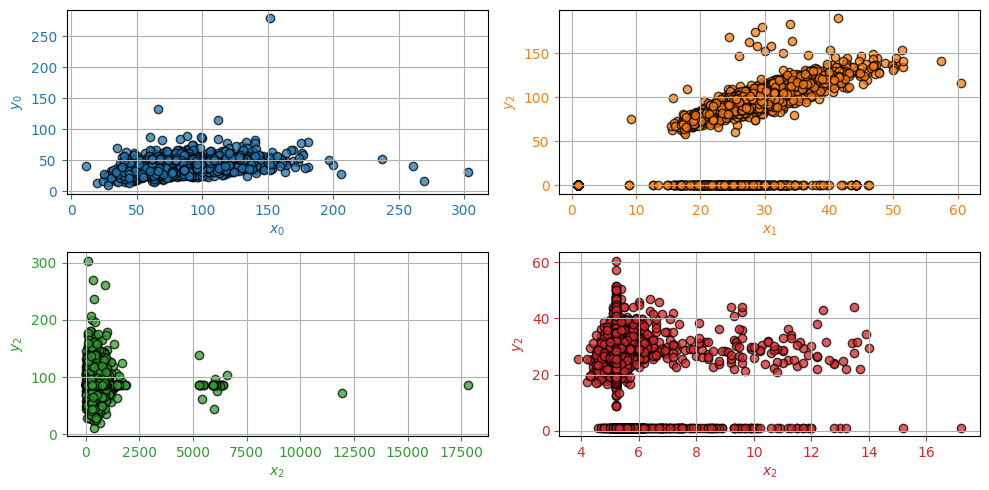

In [2]:
#Analisis exploratorio 
import matplotlib.pyplot as plt

def graficas_dispersion(ejes, x, y, color, refx, refy, ec='k', alpha=0.75, ylim=None):
    ejes.scatter(x, y, fc=color, ec=ec, alpha=alpha)
    ejes.set_xlabel(refx, color=color)
    ejes.set_ylabel(refy, color=color)
    ejes.tick_params(axis='x', colors=color)  # ← Colorea números y ticks del eje X
    ejes.tick_params(axis='y', colors=color)
    ejes.grid()
    if ylim:
        ejes.set_ylim(ylim)

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

graficas_dispersion(axs[0, 0], valor_colesterol_ldl, valor_colesterol_hdl, 'C0', '$x_0$', '$y_0$')
graficas_dispersion(axs[0, 1], masa_corporal, medida_cintura, 'C1', '$x_1$', '$y_2$')
graficas_dispersion(axs[1, 0], actividad_total, valor_colesterol_ldl, 'C2', '$x_2$', '$y_2$')
graficas_dispersion(axs[1, 1], valor_hemoglobina_glucosilada, masa_corporal, 'C3', '$x_2$', '$y_2$')


plt.tight_layout()
plt.show()


<div class="alert alert-success">

## Ejercicio 3.

En este ejercicio se implementa una función personalizada para calcular la **media aritmética** de un conjunto de datos. Este tipo de función es útil cuando se desea comprender el comportamiento central de una variable, especialmente en contextos clínicos como el análisis de masa corporal y medida de cintura, factores relevantes en el estudio de la hipertensión arterial.

```python
## BEGIN SOLUTION
def media(x):
    N = len(x)
    suma = 0
    for s in x:
        suma += s
    
    return suma / N
```

<br>

Una vez definida la función `media()`, se utiliza para calcular el promedio de dos variables clave:

- `masa_corporal`: indicador del estado nutricional del paciente.
- `medida_cintura`: medida antropométrica asociada con riesgo cardiovascular.

```python
### BEGIN SOLUTION
X = media(masa_corporal)
Y = media(medida_cintura)

print('La masa corporal promedio es: {}'.format(X))
print('El promedio de medida de cintura es: {}'.format(Y))
### END SOLUTION
```

<br>

Este código tiene las siguientes características:

- **Función generalizable**: La función `media()` puede aplicarse a cualquier arreglo numérico, lo que permite reutilizarla en distintos contextos del análisis.

- **Cálculo manual**: Aunque existen funciones como `np.mean()`, aquí se implementa el cálculo paso a paso para reforzar la comprensión del concepto de promedio.

- **Aplicación clínica**: Conocer la media de masa corporal y medida de cintura permite establecer referencias poblacionales y detectar desviaciones que podrían estar asociadas con hipertensión arterial.

<br>

Este tipo de cálculo es fundamental en estadística descriptiva y sirve como base para análisis más complejos como regresión lineal o clasificación de riesgo. En el contexto de salud pública, entender los promedios ayuda a identificar patrones generales y diseñar intervenciones más efectivas.

</div>



In [3]:
### BEGIN SOLUTION
def media(x):
    N=len(x)
    suma = 0
    for s in x:
        suma += s
    
    return suma / N
### END SOLUTION

In [4]:
### BEGIN SOLUTION
X=media(masa_corporal)
Y=media(medida_cintura)

print('La masa corporal promedio es: {}'.format(X))
print('El promedio de medida de cintura es: {}'.format(Y))
### END SOLUTION

La masa corporal promedio es: 22.451291626044146
El promedio de medida de cintura es: 68.42555581022225




<div class="alert alert-success">

## Ejercicio 4.

En este ejercicio se calcula la **pendiente \( m \)** de una relación lineal entre dos variables: `masa_corporal` (predictor) y `medida_cintura` (respuesta). Se utiliza la fórmula de mínimos cuadrados para ajustar una recta del tipo \( y = b_0 + m x \), centrando los datos con sus medias.


```python
s1 = (masa_corporal - X) * (medida_cintura - Y)
s2 = (masa_corporal - X)**2

print(s1.sum())

m = s1.sum() / s2.sum()
print(m)
```

<br>

Este código tiene las siguientes características:

- **Cálculo manual de la pendiente**: Se evita el uso de librerías externas para reforzar la comprensión del método de mínimos cuadrados.
- **Relación entre variables clínicas**: La pendiente obtenida indica cuánto cambia la medida de cintura por cada unidad de masa corporal.
- **Base para regresión lineal**: Este cálculo es el primer paso para construir un modelo predictivo que relacione variables biométricas con riesgo de hipertensión.

<br>

</div>



In [5]:
s1=(masa_corporal-X)*(medida_cintura-Y)
s2=(masa_corporal-X)**2
print(s1.sum())

m=s1.sum()/s2.sum()
print(m)



2026436.688750546
3.0635349015642817


In [6]:
#quizz.eval_numeric('3', m)


<div class="alert alert-success">

## Ejercicio 5.

En este ejercicio se calcula la **ordenada al origen \( b \)** de la recta ajustada entre las variables `masa_corporal` y `medida_cintura`. Este valor representa el punto donde la recta intersecta el eje \( y \) cuando \( x = 0 \), y completa la ecuación lineal del tipo:

$$ y = b + m x $$

La fórmula utilizada es:

$$ b = \bar{Y} - m \cdot \bar{X} $$


```python
# Cálculo de b
### BEGIN SOLUTION
b = Y - m * X
### END SOLUTION

print(f'Ordenada al origen b: {b}')
```

<br>

Este código tiene las siguientes características:

- **Complemento del modelo lineal**: La ordenada al origen permite construir la ecuación completa de la recta que relaciona masa corporal con medida de cintura.
- **Interpretación clínica**: En este contexto, \( b \) representa la medida de cintura estimada para un paciente con masa corporal igual a cero (valor teórico), útil para entender el desplazamiento vertical del modelo.
- **Preparación para predicción**: Con \( m \) y \( b \) definidos, ya es posible realizar predicciones lineales y evaluar el ajuste del modelo.

<br>

Este paso es esencial para cerrar el modelo de regresión lineal simple. En el siguiente ejercicio podemos aplicar esta ecuación para predecir valores o visualizar la recta sobre los datos reales.

</div>



In [7]:
# Cálculo de b
# b = ...
### BEGIN SOLUTION
# Cálculo de b
b = Y - m * X

### END SOLUTION

print(f'Ordenada al origen b: {b}')

Ordenada al origen b: -0.3547596713618901


In [8]:

#quizz.eval_numeric('4', b)


<div class="alert alert-success">

## Ejercicio 6.

En este ejercicio se construye una **recta ajustada** utilizando los valores de pendiente \( m \) y ordenada al origen \( b \) calculados previamente. Esta recta representa la relación lineal entre `masa_corporal` y `medida_cintura`, y permite realizar predicciones o visualizar el comportamiento estimado de la variable respuesta.

<font color="Black">

Para ello se deben realizar los siguientes pasos:

- Construir un arreglo de 10 elementos llamado `xr0`, que represente valores simulados de masa corporal dentro del rango observado.
- Evaluar la ecuación de la recta \( y = mx + b \) sobre ese arreglo para obtener `yr0`, que representa las medidas de cintura estimadas.

</font>

```python
# Construcción del arreglo xr0 con 10 elementos
xr0 = np.linspace(masa_corporal.min(), masa_corporal.max(), 10)

# Evaluar yr0 usando la ecuación de la recta
yr0 = m * xr0 + b

print("\nArreglo xr0:")
print(xr0)
print("\nArreglo yr0:")
print(yr0)
```

<br>


</div>



In [9]:
# Construcción del arreglo xr0 con 10 elementos
xr0 = np.linspace(masa_corporal.min(), masa_corporal.max(), 10)

# Evaluar yr0 usando la ecuación de la recta
yr0 = m * xr0 + b


print("\nArreglo xr0:")
print(xr0)
print("\nArreglo yr0:")
print(yr0)


Arreglo xr0:
[ 1.          7.6126085  14.22521699 20.83782549 27.45043399 34.06304248
 40.67565098 47.28825948 53.90086797 60.51347647]

Arreglo yr0:
[  2.70877523  22.96673215  43.22468907  63.48264599  83.74060291
 103.99855983 124.25651675 144.51447367 164.77243059 185.03038751]



<div class="alert alert-info">

## Ejercicio 7.

Si realizaste correctamente los ejercicios **1 al 6**, esta celda de código graficará la relación entre `masa_corporal` y `medida_cintura`, mostrando tanto los datos reales como la **recta ajustada** que construiste con los valores de \( m \) y \( b \).

**NOTA**: En esta visualización estamos utilizando la biblioteca `matplotlib.pyplot`, y la función personalizada `graficas_dispersion()` definida anteriormente.

<br>



Esta visualización es clave para validar si el modelo de regresión lineal representa adecuadamente los datos. Si los puntos se alinean cerca de la recta, el modelo tiene buen ajuste. En el siguiente ejercicio podemos calcular métricas de error para cuantificar esta precisión.
</div>


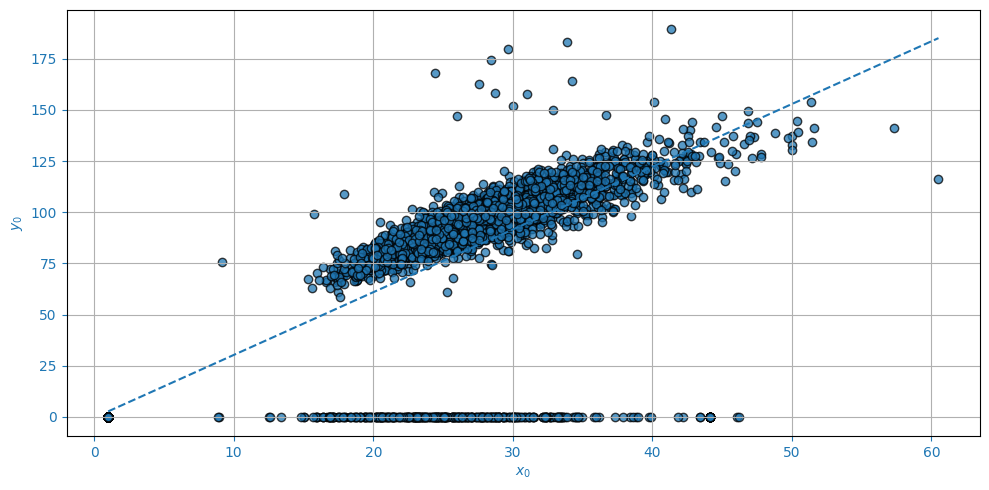

In [10]:
# Crear figura y subplots
fig, axs = plt.subplots(figsize=(10, 5))

# Graficar la recta ajustada (línea de regresión)
axs.plot(xr0, yr0, color="C0", linestyle='--')

# Graficar los datos reales como dispersión
graficas_dispersion(axs, masa_corporal, medida_cintura, 'C0', '$x_0$', '$y_0$')

plt.tight_layout()
plt.show()

In [11]:
#quizz.eval_numeric('7', X0)
#quizz.eval_numeric('8', Y0)

<div class="alert alert-success">

## Ejercicio 8.

<font color="Black">

Construir la función `mincua(x, y)` para calcular los coeficientes de regresión lineal \( m \) (pendiente) y \( b \) (ordenada al origen) de un conjunto de datos. Esta función recibe como entrada dos arreglos numéricos `x` y `y`, y regresa los valores calculados de \( m \) y \( b \).

Aplicar la función a los siguientes pares de variables reales del conjunto de datos, utilizando la estructura `val_x`, `val_y`:

- `edad` vs `tension_arterial`, almacenar en `m1`, `b1`  
- `masa_corporal` vs `medida_cintura`, almacenar en `m2`, `b2`  
- `actividad_total` vs `valor_colesterol_ldl`, almacenar en `m3`, `b3`

</font>

```python
import numpy as np

# Función mincua para calcular m y b
def mincua(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    s1 = (x - x_mean) * (y - y_mean)
    s2 = (x - x_mean)**2
    m = s1.sum() / s2.sum()
    
    b = y_mean - m * x_mean
    return m, b

# Cálculo para edad vs tensión arterial
val_x = edad
val_y = tension_arterial
m1, b1 = mincua(val_x, val_y)

# Cálculo para masa corporal vs medida de cintura
val_x = masa_corporal
val_y = medida_cintura
m2, b2 = mincua(val_x, val_y)

# Cálculo para actividad total vs colesterol LDL
val_x = actividad_total
val_y = valor_colesterol_ldl
m3, b3 = mincua(val_x, val_y)

# Imprimir resultados
print(f"Edad vs Tensión arterial → m1: {m1:.2f}, b1: {b1:.2f}")
print(f"Masa corporal vs Medida cintura → m2: {m2:.2f}, b2: {b2:.2f}")
print(f"Actividad total vs Colesterol LDL → m3: {m3:.2f}, b3: {b3:.2f}")
```

<br>

Este código tiene las siguientes características:

- **Función generalizable**: `mincua()` puede aplicarse a cualquier par de variables numéricas para obtener la recta de regresión lineal.
- **Estructura modular**: Se utiliza `val_x` y `val_y` para facilitar la reutilización del código y mantener claridad en cada análisis.
- **Aplicación clínica**: Se analizan relaciones relevantes para la salud como:
  - Cómo cambia la presión arterial con la edad.
  - Cómo se relacionan masa corporal y medida de cintura.
  - Cómo influye la actividad física en los niveles de colesterol LDL.
- **Preparación para visualización o predicción**: Los coeficientes obtenidos pueden usarse para graficar rectas ajustadas o realizar estimaciones.

<br>

Este ejercicio consolida el uso de regresión lineal en contextos reales, permitiendo modelar relaciones entre variables clínicas y de estilo de vida. En el siguiente paso podemos construir los arreglos `xr0` y `yr0` para visualizar estas rectas.

</div>



In [12]:
df.columns

Index(['edad', 'sexo', 'actividad_total', 'valor_hemoglobina_glucosilada',
       'resultado_glucosa_promedio', 'valor_colesterol_ldl',
       'valor_colesterol_hdl', 'valor_trigliceridos', 'masa_corporal',
       'medida_cintura', 'riesgo_hipertension', 'tension_arterial'],
      dtype='object')

In [13]:
# Función mincua para calcular m y b
def mincua(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    s1 = (x - x_mean) * (y - y_mean)
    s2 = (x - x_mean)**2
    m = s1.sum() / s2.sum()
    
    b = y_mean - m * x_mean
    return m, b
# guardaremos varias veces en val_x, val_y ya lo usaremos como generalidad, podemos graficar cualquier correlacion
# pureva con diferentes columnas para que veas que tanto influye una variable a otra 
# Cálculo para edad vs tensión arterial
val_x = edad
val_y = tension_arterial
m1, b1 = mincua(val_x, val_y)

# Cálculo para masa corporal vs medida de cintura
val_x = masa_corporal
val_y = medida_cintura
m2, b2 = mincua(val_x, val_y)

# Cálculo para actividad total vs colesterol LDL
val_x = actividad_total
val_y = valor_colesterol_ldl
m3, b3 = mincua(val_x, val_y)

# Imprimir resultados
print(f"Edad vs Tensión arterial → m1: {m1:.2f}, b1: {b1:.2f}")
print(f"Masa corporal vs Medida cintura → m2: {m2:.2f}, b2: {b2:.2f}")
print(f"Actividad total vs Colesterol LDL → m3: {m3:.2f}, b3: {b3:.2f}")

Edad vs Tensión arterial → m1: 0.54, b1: 98.23
Masa corporal vs Medida cintura → m2: 3.06, b2: -0.35
Actividad total vs Colesterol LDL → m3: -0.00, b3: 88.01



<div class="alert alert-success">

## Ejercicio 9.

En este ejercicio se construyen los arreglos `xr0` y `yr0` para visualizar la **recta de regresión lineal** obtenida con la función `mincua()`. Esta recta representa la relación estimada entre dos variables clínicas, y permite realizar predicciones dentro del rango observado.


```python
# Construcción del arreglo xr0 con 10 elementos dentro del rango de edad
xr0 = np.linspace(edad.min(), edad.max(), 10)

# Evaluar yr0 usando la ecuación de la recta
yr0 = m1 * xr0 + b1

# Imprimir resultados
print("\nArreglo xr0:")
print(xr0)

print("\nArreglo yr0:")
print(yr0)
```

<br>

</div>



In [14]:
# Construcción del arreglo xr0 con 10 elementos dentro del rango de edad
xr0 = np.linspace(edad.min(), edad.max(), 10)

# Evaluar yr0 usando la ecuación de la recta
yr0 = m1 * xr0 + b1

# Imprimir resultados
print("\nArreglo xr0:")
print(xr0)

print("\nArreglo yr0:")
print(yr0)


Arreglo xr0:
[ 4.         13.88888889 23.77777778 33.66666667 43.55555556 53.44444444
 63.33333333 73.22222222 83.11111111 93.        ]

Arreglo yr0:
[100.39030827 105.71919657 111.04808488 116.37697318 121.70586149
 127.03474979 132.3636381  137.69252641 143.02141471 148.35030302]


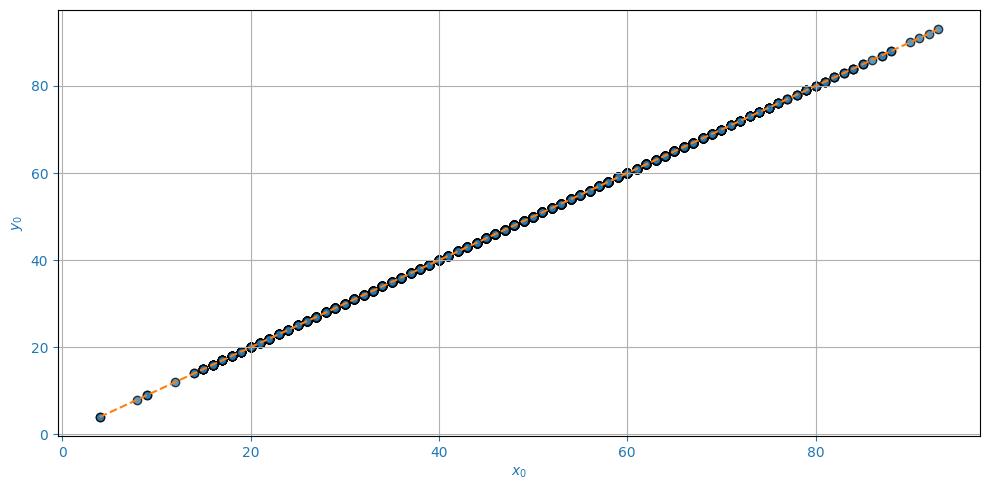

In [21]:
val_x = edad
val_y = edad
m1, b1 = mincua(val_x, val_y)

xr0 = np.linspace(edad.min(), edad.max(), 10)
yr0 = m1 * xr0 + b1

fig, axs = plt.subplots(figsize=(10, 5))
axs.plot(xr0, yr0, color="C1", linestyle='--', label='Recta de regresión')
graficas_dispersion(axs, val_x, val_y, 'C0', '$x_0$', '$y_0$')
plt.tight_layout()
plt.show()

In [16]:
#quizz.eval_numeric('9', [m1, b1])
#quizz.eval_numeric('10', [m2, b2])
#quizz.eval_numeric('11', [m3, b3])

<div class="alert alert-success">

## **Ejercicio 7.**

<font color="Black">
    
Construir las rectas de cada conjunto de datos como sigue:

* Usando `m1` y `b1` construir los arreglos de coordenadas `xr1` y `yr1`.
* Usando `m2` y `b2` construir los arreglos de coordenadas `xr2` y `yr2`.
* Usando `m3` y `b3` construir los arreglos de coordenadas `xr3` y `yr3`.

</font>

</div>

In [17]:
# Construcción de las rectas
# xr1 = np.linspace( ... )
# yr1 = ...
# ...
### BEGIN SOLUTION
# Construcción de las rectas
xr1 = np.linspace(x1.min(), x1.max(), 10)
yr1 = m1 * xr1 + b1

xr2 = np.linspace(x2.min(), x2.max(), 10)
yr2 = m2 * xr2 + b2

xr3 = np.linspace(x3.min(), x3.max(), 10)
yr3 = m3 * xr3 + b3

### END SOLUTION

NameError: name 'x1' is not defined

In [ ]:
print(xr1, yr1, sep = '\n', end='\n\n')
print(xr2, yr2, sep = '\n', end='\n\n')
print(xr3, yr3, sep = '\n', end='\n\n')

In [ ]:
"""
quizz.eval_numeric('12', xr1)
quizz.eval_numeric('13', yr1)
quizz.eval_numeric('14', xr2)
quizz.eval_numeric('15', yr2)
quizz.eval_numeric('16', xr3) 
quizz.eval_numeric('17', yr3)
"""

<div class="alert alert-info">

Si caculaste todo correctamente, entonces la siguiente celda de código graficará los cuatro conjuntos de datos junto con las líneas rectas que construiste.

</div>

In [ ]:
"""axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),
        dict(xlabel='$x_1$', ylabel='$y_1$'),
        dict(xlabel='$x_2$', ylabel='$y_2$'),
        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]

vis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)

vis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')
vis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75)

vis.plot(2, xr1, yr1, c='C1', lw=2, ls = '--')
vis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)

vis.plot(3, xr2, yr2, c='C2', lw=2, ls = '--')
vis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)

vis.plot(4, xr3, yr3, c='C3', lw=2, ls = '--')
vis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)

vis.tight_layout()
vis.grid()
vis.show()"""

In [ ]:

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

graficas_dispersion(axs[0, 0], x0, y0, 'C0', '$x_0$', '$y_0$')
axs[0,0].plot(xr0,yr0,color="C0",linestyle='--')

graficas_dispersion(axs[0, 1], x1, y1, 'C1', '$x_1$', '$y_2$')
axs[0,1].plot(xr1,yr1,color="C1",linestyle='--')

graficas_dispersion(axs[1, 0], x2, y2, 'C2', '$x_2$', '$y_2$')
axs[1,0].plot(xr2,yr2,color="C2",linestyle='--')

graficas_dispersion(axs[1, 1], x3, y3, 'C3', '$x_3$', '$y_3$', ec='dimgrey', ylim=(-5, 5))
axs[1,1].plot(xr3,yr3,color="C0",linestyle='--')

plt.tight_layout()
plt.show()

# Apéndice A: Deducción del método.

Dado el conjunto de datos:

| $x_0$ | $x_1$ | $x_2$ | $\dots$ | $x_N$ |
|-----|-----|-----|---------|-----|
| $y_0$ | $y_1$ | $y_2$ | $\dots$ | $y_N$ |

lo que en principio desearíamos es que se cumpliera que:

$$y_i = m x_i + b \;\; \text{para} \;\; i = 0, \dots, N $$

que es equivalente a 

$$0 = m x_i + b - y_i\;\; \text{para} \;\; i = 0, \dots, N, \tag{A.1} $$


Pero la ecuación $(A.1)$ no se cumple en general, de tal manera que lo que se pide es que las desviaciones de cada punto con respecto de la recta sean pequeñas. 

En el caso de este método, la desviación se define como la diferencia del valor $y_i$ con respecto de la recta elevada al cuadrado, es decir: $(m x_i + b - y_i)^2$. Y para calcular la desviación global se suman todas las diferencias, por lo que obtenemos:

$$
f(m,b) = \sum_{i=1}^{N} (m x_i + b - y_i)^2
$$

Observa que del lado derecho hemos puesto $f(m,b)$ es decir, una función que depende de la pendiente $m$ y de la ordenada al origen $b$. 

El valor de la función $f$ (la desviación global) depende de $m$ y $b$; entonces para encontrar los valores de $m$ y $b$ más adecuados, debemos minimizar $f$ con respecto a esas variables.

Recordando nuestras clases de cálculo, sabemos que para minimizar una función, debemos calcular su derivada, igualarla a cero y resolver para encontrar los puntos críticos (máximos y mínimos). En este caso, debemos derivar con respecto a $m$ y con respecto a $b$, y luego resolver un sistema de dos ecuaciones. Veamos como:

$$
\begin{eqnarray}
\dfrac{\partial f}{\partial m} & = & \dfrac{\partial}{\partial m} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2 \sum_{i=1}^{N} x_i \big(m x_i + b - y_i\big) = 0 \tag{A.2}\\
\dfrac{\partial f}{\partial b} & = & \dfrac{\partial}{\partial b} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2\sum_{i=1}^{N} \big(m x_i + b - y_i\big) = 0 \tag{A.3}\\
\end{eqnarray}
$$

De la ecuación $(A.3)$ tenemos que:
$$
m \sum_{i=1}^{N} x_i + \sum_{i=1}^{N} b - \sum_{i=1}^{N} y_i = 0
$$

y despejando $b$ obtenemos:
$$
b = \underbrace{\dfrac{1}{N}\sum_{i=1}^{N} y_i}_{\bar{y}} - m \underbrace{\dfrac{1}{N} \sum_{i=1}^{N} x_i}_{\bar{x}} = \bar{y} - m \bar{x} \tag{A.4}
$$

Ahora sustituimos $(A.4)$ en $(A.2)$ y obtenemos:

$$
\sum_{i=1}^{N} x_i \big(m x_i + \bar{y} - m \bar{x} - y_i\big) = 0
$$

Ahora despejamos $m$:

$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} \tag{A.5}
$$

Las ecuaciones $(A.4)$ y $(A.5)$ proporcionan los valores de $m$ y $b$ de un punto crítico de la función $f(m,b)$. Falta demostrar que ese punto crítico es un mínimo. Para ello se deben calcular las derivadas segundas ($\dfrac{\partial}{\partial^2 m}$, $\dfrac{\partial}{\partial^2 b}$, $\dfrac{\partial}{\partial m \partial b}$) y ver que se cumplen los criterios necesarios.